In [1]:
from utils.save import load_json_array
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
biu_results_path = "../../others/TyXe/safebox/TyXe-results-220809.json"
sml_results_path = "../../others/TyXe/safebox/SML-placeholder.json"
baselines_results_dir = "../safebox"
results_df = load_json_array(biu_results_path)
results_df

,auc,error,init_scale,loss,n_epochs_on_test,period,seed,train_time,version
0,0.723217,0.336292,1,0.610153,12,mean,31,69.044116,version_42
1,0.722172,0.337883,1,0.611335,14,mean,8,85.698261,version_41
2,0.722751,0.336490,1,0.610671,13,mean,68,78.409242,version_43
3,0.723072,0.336183,1,0.610667,17,mean,6202,101.055938,version_40
4,0.723157,0.337147,1,0.611131,13,mean,75,84.295293,version_44


In [3]:
bm_results_path = baselines_results_dir + "/BM-results-220809.json"
iu_results_path = baselines_results_dir + "/IU-results-220809.json"
load_json_array(bm_results_path)

,auc,loss,n_epochs_on_test,period,seed,timestamp,trainLoss,train_time
0,0.722210,0.611125,20,mean,6202,220809T212809,0.448323,622.389964
1,0.722654,0.611112,20,mean,8,220809T223554,0.448360,536.503155
2,0.722250,0.611341,20,mean,31,220809T223916,0.448801,539.327266
3,0.722718,0.610939,20,mean,68,220809T224305,0.448798,509.012239
4,0.722463,0.611042,20,mean,75,220809T225639,0.448940,526.628254


In [4]:
results_df = pd.concat({
    "BIU": load_json_array(biu_results_path),
    "BM": load_json_array(bm_results_path),
    "IU": load_json_array(iu_results_path),
    "SML": load_json_array(sml_results_path)
}).reset_index().rename({"level_0": "training_regime"}, axis=1)
results_df

,training_regime,level_1,auc,error,init_scale,loss,n_epochs_on_test,period,seed,train_time,version,timestamp,trainLoss
0,BIU,0,0.723217,0.336292,1,0.610153,12,mean,31,69.044116,version_42,NaN,NaN
1,BIU,1,0.722172,0.337883,1,0.611335,14,mean,8,85.698261,version_41,NaN,NaN
2,BIU,2,0.722751,0.336490,1,0.610671,13,mean,68,78.409242,version_43,NaN,NaN
3,BIU,3,0.723072,0.336183,1,0.610667,17,mean,6202,101.055938,version_40,NaN,NaN
4,BIU,4,0.723157,0.337147,1,0.611131,13,mean,75,84.295293,version_44,NaN,NaN
5,BM,0,0.722210,NaN,NaN,0.611125,20,mean,6202,622.389964,NaN,220809T212809,0.448323
6,BM,1,0.722654,NaN,NaN,0.611112,20,mean,8,536.503155,NaN,220809T223554,0.448360
7,BM,2,0.722250,NaN,NaN,0.611341,20,mean,31,539.327266,NaN,220809T223916,0.448801
8,BM,3,0.722718,NaN,NaN,0.610939,20,mean,68,509.012239,NaN,220809T224305,0.448798
9,BM,4,0.722463,NaN,NaN,0.611042,20,mean,75,526.628254,NaN,220809T225639,0.448940


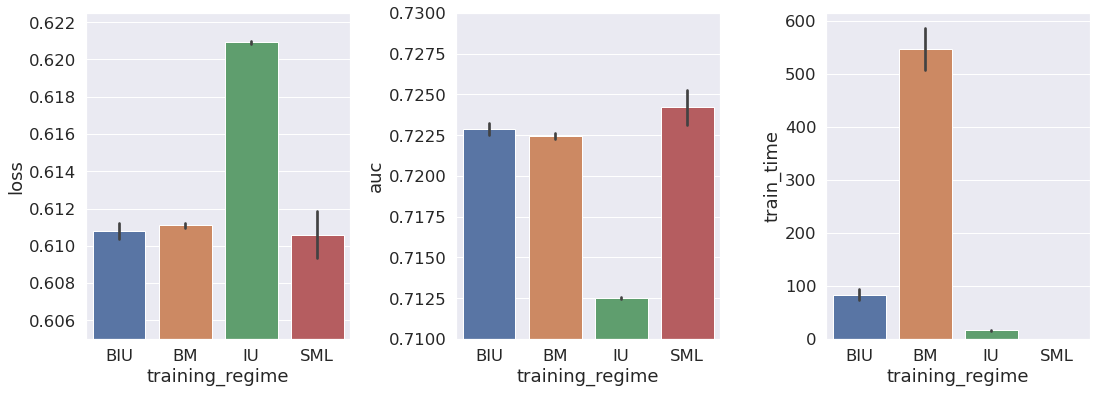

In [5]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(1, 3, figsize =(18, 6), gridspec_kw=dict(wspace=0.4))
loss_barplot = sns.barplot(x="training_regime", y="loss", data=results_df, ci="sd", ax=axes[0])
loss_barplot.set_ylim(0.605, 0.6225)
auc_barplot = sns.barplot(x="training_regime", y="auc", data=results_df, ci="sd", ax=axes[1])
auc_barplot.set_ylim(0.71, 0.73)
time_barplot = sns.barplot(x="training_regime", y="train_time", data=results_df, ci="sd", ax=axes[2])
# time_barplot.set_ylim(0.605, 0.6225)

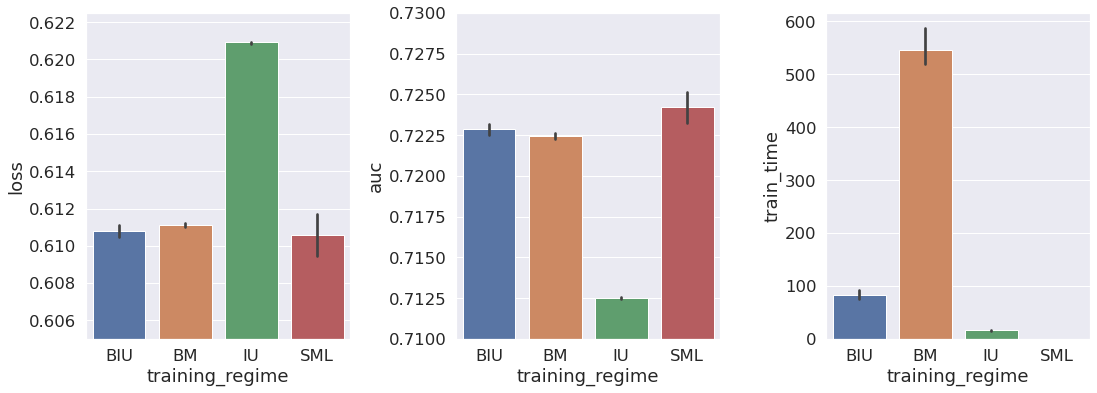

In [6]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(1, 3, figsize =(18, 6), gridspec_kw=dict(wspace=0.4))
loss_barplot = sns.barplot(x="training_regime", y="loss", data=results_df, ax=axes[0])
loss_barplot.set_ylim(0.605, 0.6225)
auc_barplot = sns.barplot(x="training_regime", y="auc", data=results_df, ax=axes[1])
auc_barplot.set_ylim(0.71, 0.73)
time_barplot = sns.barplot(x="training_regime", y="train_time", data=results_df, ax=axes[2])
# time_barplot.set_ylim(0.605, 0.6225)